In [67]:
import os, cv2, re, random
import numpy as np
import pandas as pd
import json
from pprint import pprint
import matplotlib.pyplot as plt

In [68]:
# from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import img_to_array, load_img
# from keras import layers, models, optimizers
# from keras import backend as K

In [69]:
ann_DIR=r"C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/ann/"
img_DIR=r"C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/"

In [70]:
img=[img_DIR+i for i in os.listdir(img_DIR)] 
ann=[ann_DIR+i for i in os.listdir(ann_DIR)] 

In [71]:
img[0]

'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/00000000_E112YB13.png'

In [72]:
ann[0]

'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/ann/00000000_E112YB13.json'

In [113]:
with open(ann[0]) as f:
    data = json.load(f)

pprint(data)

{'description': '',
 'objects': [{'bitmap': {'np': [], 'origin': []},
              'classTitle': 'plate_bbox',
              'description': '',
              'points': {'exterior': [[26.0, 43.0], [101.0, 61.0]],
                         'interior': []},
              'tags': [],
              'type': 'rectangle'}],
 'size': {'height': 64, 'width': 128},
 'tags': ['train']}


In [99]:
data['objects'][0]['points']['exterior']

[[26.0, 43.0], [101.0, 61.0]]

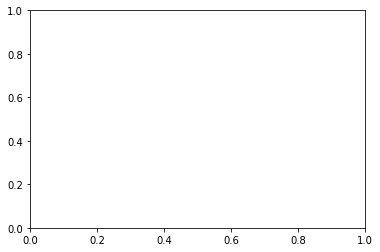

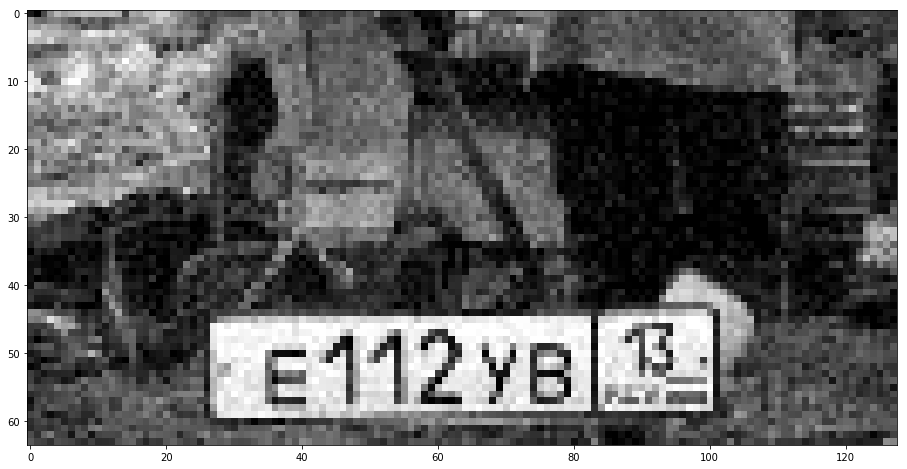

In [124]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(16,8))
fig,ax = plt.subplots(1)

img_=mpimg.imread(img[0])
imgplot = plt.imshow(img_,cmap='gray')
rect = patches.Rectangle((26.0, 43.0),128,64,linewidth=1,edgecolor='r',facecolor='none')
# [26.0, 43.0], [101.0, 61.0]
# Add the patch to the Axes
ax.add_patch(rect)

plt.show()


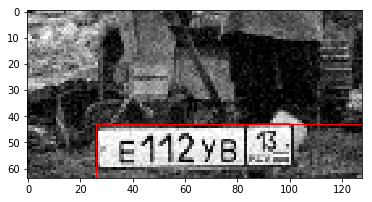

In [120]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

im = np.array(Image.open(img[0]), dtype=np.uint8)

# Create figure and axes

fig,ax = plt.subplots(1)


# Display the image
ax.imshow(im,cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((26.0, 43.0),128,64,linewidth=1,edgecolor='r',facecolor='none')
# [26.0, 43.0], [101.0, 61.0]
# Add the patch to the Axes
ax.add_patch(rect)

plt.show()